In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
movie_titles=pd.read_csv("movies.csv")
movie_titles.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [6]:
movie_ratings=pd.read_csv("ratings.csv")
movie_ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [7]:
movie_ratings.shape

(100836, 4)

In [8]:
movie_titles.drop(["genres"],inplace=True,axis=1)
movie_titles.head()

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)


In [9]:
movie_ratings.drop(["timestamp"],inplace=True,axis=1)
movie_ratings.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [10]:
merged_movie_df=pd.merge(movie_ratings, movie_titles, on='movieId')
merged_movie_df.head()

,userId,movieId,rating,title
0,1,1,4.0,Toy Story (1995)
1,5,1,4.0,Toy Story (1995)
2,7,1,4.5,Toy Story (1995)
3,15,1,2.5,Toy Story (1995)
4,17,1,4.5,Toy Story (1995)


In [11]:
merged_movie_df.groupby('title').describe().T

title          '71 (2014)  'Hellboy': The Seeds of Creation (2004)  \
userId  count         1.0                                      1.0   
        mean        610.0                                    332.0   
        std           NaN                                      NaN   
        min         610.0                                    332.0   
        25%         610.0                                    332.0   
        50%         610.0                                    332.0   
        75%         610.0                                    332.0   
        max         610.0                                    332.0   
movieId count         1.0                                      1.0   
        mean     117867.0                                  97757.0   
        std           NaN                                      NaN   
        min      117867.0                                  97757.0   
        25%      117867.0                                  97757.0   
        50%      117867.0                                  97757.0   
        75%      117867.0                                  97757.0   
        max      117867.0                                  97757.0   
rating  count         1.0                                      1.0   
        mean          4.0                                      4.0   
        std           NaN                                      NaN   
        min           4.0                                      4.0   
        25%           4.0                                      4.0   
        50%           4.0                                      4.0   
        75%           4.0                                      4.0   
        max           4.0                                      4.0   

title          'Round Midnight (1986)  'Salem's Lot (2004)  \
userId  count                2.000000                  1.0   
        mean               354.500000                345.0   
        std                 31.819805                  NaN   
        min                332.000000                345.0   
        25%                343.250000                345.0   
        50%                354.500000                345.0   
        75%                365.750000                345.0   
        max                377.000000                345.0   
movieId count                2.000000                  1.0   
        mean             26564.000000              27751.0   
        std                  0.000000                  NaN   
        min              26564.000000              27751.0   
        25%              26564.000000              27751.0   
        50%              26564.000000              27751.0   
        75%              26564.000000              27751.0   
        max              26564.000000              27751.0   
rating  count                2.000000                  1.0   
        mean                 3.500000                  5.0   
        std                  0.000000                  NaN   
        min                  3.500000                  5.0   
        25%                  3.500000                  5.0   
        50%                  3.500000                  5.0   
        75%                  3.500000                  5.0   
        max                  3.500000                  5.0   

title          'Til There Was You (1997)  'Tis the Season for Love (2015)  \
userId  count                   2.000000                              1.0   
        mean                  229.000000                             21.0   
        std                   164.048773                              NaN   
        min                   113.000000                             21.0   
        25%                   171.000000                             21.0   
        50%                   229.000000                             21.0   
        75%                   287.000000                             21.0   
        max                   345.000000                             21.0   
movie

In [12]:
merged_movie_df.groupby('title')['rating'].mean().head()

title
'71 (2014)                                 4.0
'Hellboy': The Seeds of Creation (2004)    4.0
'Round Midnight (1986)                     3.5
'Salem's Lot (2004)                        5.0
'Til There Was You (1997)                  4.0
Name: rating, dtype: float64

Let's sort the movie titles by the descending order of the average user ratings

In [13]:
merged_movie_df.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Gena the Crocodile (1969)              5.0
True Stories (1986)                    5.0
Cosmic Scrat-tastrophe (2015)          5.0
Love and Pigeons (1985)                5.0
Red Sorghum (Hong gao liang) (1987)    5.0
Name: rating, dtype: float64

Let's now print the movies in the descending order of their rating counts.

In [14]:
merged_movie_df.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Forrest Gump (1994)                 329
Shawshank Redemption, The (1994)    317
Pulp Fiction (1994)                 307
Silence of the Lambs, The (1991)    279
Matrix, The (1999)                  278
Name: rating, dtype: int64

A movie which is rated by large number of people is usually a good movie.

Let's create a DataFrame that shows the title, mean rating and the rating counts.

In [15]:
movie_rating_mean_count= pd.DataFrame(columns=["rating_mean","rating_count"])

movie_rating_mean_count["rating_mean"]=merged_movie_df.groupby('title')['rating'].mean()

movie_rating_mean_count["rating_count"]=merged_movie_df.groupby('title')['rating'].count()

movie_rating_mean_count.head()

,rating_mean,rating_count
title,,
'71 (2014),4.0,1
'Hellboy': The Seeds of Creation (2004),4.0,1
'Round Midnight (1986),3.5,2
'Salem's Lot (2004),5.0,1
'Til There Was You (1997),4.0,2


We will plot a histogram to see how the average ratings are distributed.

<AxesSubplot: >

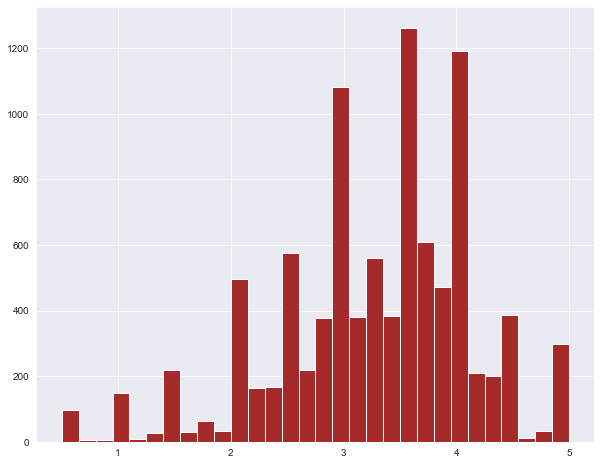

In [32]:
plt.figure(figsize=(10,8))
sns.set_style("darkgrid")

movie_rating_mean_count['rating_mean'].hist(bins=30,color='brown')

Distribution for Rating Counts

<AxesSubplot: >

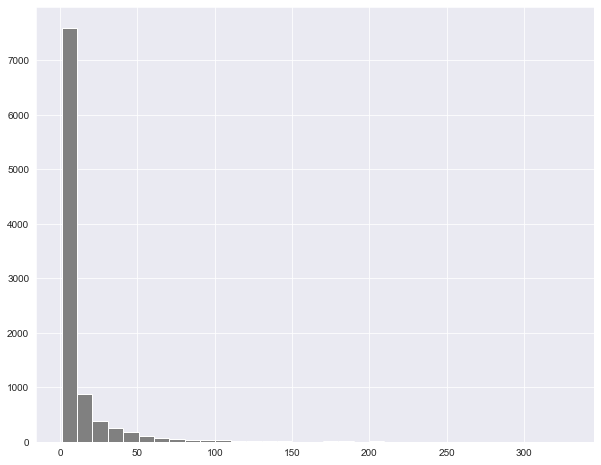

In [18]:
plt.figure(figsize=(10,8))
sns.set_style("darkgrid")

movie_rating_mean_count["rating_count"].hist(bins=33, color="grey")

<AxesSubplot: xlabel='rating_mean', ylabel='rating_count'>

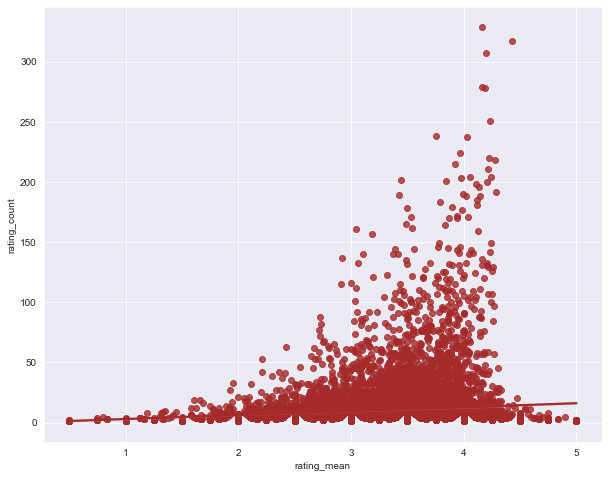

In [19]:
plt.figure(figsize=(10,8))
sns.set_style("darkgrid")
sns.regplot(x="rating_mean",y="rating_count",data=movie_rating_mean_count, color="brown")

Let's sort our dataset by rating counts and see the average ratings of the movies with the top 5 highest number of ratings.



In [20]:
movie_rating_mean_count.sort_values("rating_count",ascending=False).head()

,rating_mean,rating_count
title,,
Forrest Gump (1994),4.164134,329
"Shawshank Redemption, The (1994)",4.429022,317
Pulp Fiction (1994),4.197068,307
"Silence of the Lambs, The (1991)",4.161290,279
"Matrix, The (1999)",4.192446,278


# Item Based Collaborative Filtering

In item based collaborative filtering, products are recommended based on common characteristics.

In our dataset we have average ratings for different movies given by different users. We will 
use the average ratings as the common characteristic of the collaborative filtering of movies.

The first step is to create a dataframe where each movie is represented by a column and rows contain user ratings for movies.

In [21]:
user_movie_rating_matrix= merged_movie_df.pivot_table(index="userId",columns='title',values='rating')

user_movie_rating_matrix

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
607,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
608,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.5,3.5,NaN,NaN,NaN


In [22]:
user_movie_rating_matrix.shape

(610, 9719)

Now, we will find movie recommendation based on a single movie and then based on multiple movies.

Finding recommendation based on a single movie- Suppose we want to find recommendation based on the movie Pulp Fiction (1994).

First we will filter the column that contains the user ratings for the movie.

In [23]:
pulp_fiction_ratings=user_movie_rating_matrix["Pulp Fiction (1994)"]

Next, we will find the correlation between the user ratings of all the movies and the user ratings for the movie pulp fiction.

In [24]:
pulp_fiction_correlations=pd.DataFrame(user_movie_rating_matrix.corrwith(pulp_fiction_ratings),columns=["pf_corr"])

C:\Users\Priyanka\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\function_base.py:2821: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Priyanka\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\function_base.py:2680: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [25]:
pulp_fiction_correlations.sort_values("pf_corr",ascending=False).head()

,pf_corr
title,
Rare Exports: A Christmas Tale (Rare Exports) (2010),1.0
Azumi (2003),1.0
"Maxed Out: Hard Times, Easy Credit and the Era of Predatory Lenders (2006)",1.0
"War Zone, The (1999)",1.0
"Wolfman, The (2010)",1.0


Correlation itself is not giving meaningful results, one solution to this problem can be that in addition to the correlation between the movies, we also use rating counts, for the
correlated movie as a criteria for finding the best recommendation.

In [26]:
pulp_fiction_correlations=pulp_fiction_correlations.join(movie_rating_mean_count["rating_count"])

pulp_fiction_correlations.head()

,pf_corr,rating_count
title,,
'71 (2014),NaN,1
'Hellboy': The Seeds of Creation (2004),NaN,1
'Round Midnight (1986),NaN,2
'Salem's Lot (2004),NaN,1
'Til There Was You (1997),NaN,2


The pf_corr column contains some NaN values. This is because there can be movies that are rated by users who did not rated Pulp Fiction (1994). In such cases, correlation will be null.

We will remove all the movies with Null correlation with Pulp Fiction (1994)

In [27]:
pulp_fiction_correlations.dropna(inplace=True)

In [28]:
pulp_fiction_correlations.sort_values("pf_corr",ascending=False).head()

,pf_corr,rating_count
title,,
Rare Exports: A Christmas Tale (Rare Exports) (2010),1.0,2
Azumi (2003),1.0,2
"Maxed Out: Hard Times, Easy Credit and the Era of Predatory Lenders (2006)",1.0,2
"War Zone, The (1999)",1.0,2
"Wolfman, The (2010)",1.0,2


A better way is to find the movies with rating counts of atleast 50 and having the highest correlation with Pulp Fiction (1994).

[ ]


In [29]:
pulp_fiction_correlations_50= pulp_fiction_correlations[pulp_fiction_correlations['rating_count']>50]

pulp_fiction_correlations_50.sort_values('pf_corr',ascending=False).head()

,pf_corr,rating_count
title,,
Pulp Fiction (1994),1.000000,307
"Wolf of Wall Street, The (2013)",0.579915,54
Fight Club (1999),0.543465,218
Kill Bill: Vol. 1 (2003),0.504147,131
Interstellar (2014),0.503411,73


In [30]:
all_movie_correlations= user_movie_rating_matrix.corr(method='pearson',min_periods=50)

In [31]:
all_movie_correlations.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
title,,,,,,,,,,,,,,,,,,,,,
'71 (2014),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Hellboy': The Seeds of Creation (2004),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Round Midnight (1986),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Salem's Lot (2004),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Til There Was You (1997),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
